# Simple Linear Regression

In depth explanation  
https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/


In [4]:
import matplotlib.pyplot as plt
import numpy as np

## Create n random samples

In [5]:
n = 20

m 4.716675485707289 b 5.681207159052416


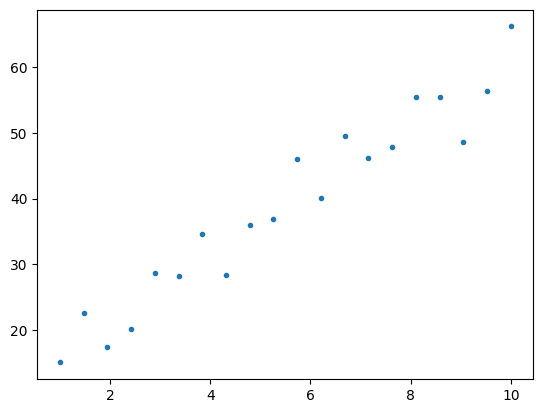

In [6]:
x =  np.linspace(1, 10, n)
m =  (np.random.random() -0.5) * 10
r = np.random.rand(n) * 3
b =  np.random.random() * 10
y = (x+r) * m + b
print("m",m,"b",b)
plt.plot(x, y, '.')


## Line equation
$$ y = mX + b $$

## Gradient descent

### Mean squared error

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 $$

### Root mean squared error

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2} $$

### Derivative of cost function

$$  J_m' = \frac{2}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i) x_i $$

$$  J_b' = \frac{2}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i) $$

In [7]:
def cost_function(y, yhat):
    err = np.square(y - yhat)
    err = err.sum()
    return np.sqrt(err) / len(y)

def derivatives(x, y, yhat):
    dm = (yhat - y) * x
    dm = 2 * dm.mean()
    db = yhat - y
    db = 2 * db.mean()
    return dm, db 

### Initialize parameters and learning rate

In [29]:
m = 1
b = 0
learning_rate = 0.02
mse = []

Run this cell multiple times to observe iterations

Current m 6.040 b 1.071
Cost 1.4657
Derivative of m -36.038 and b -9.359
Updated m 6.761 and b 1.259


Text(0.5, 1.0, 'MSE last 20 epoch')

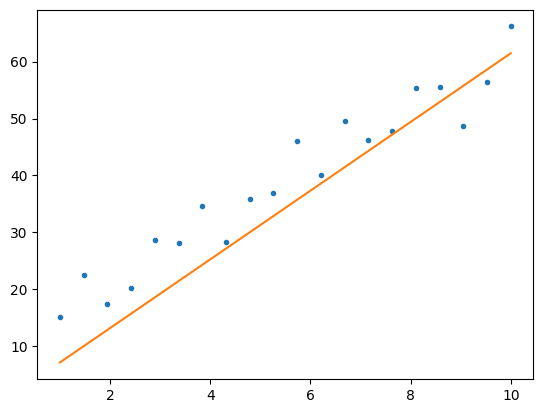

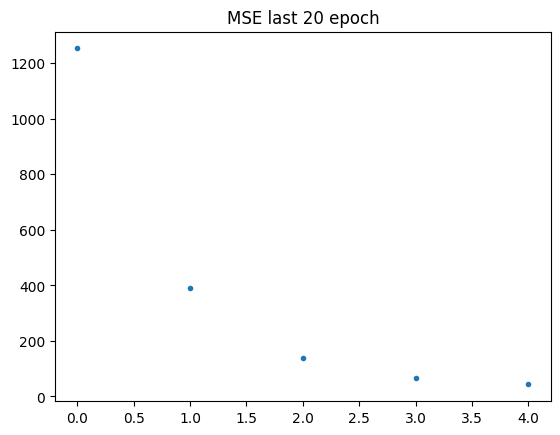

In [34]:
print(f"Current m {m:.3f} b {b:.3f}")
yhat = m * x + b

# Calculate mean squared error
mse.append(np.square(y - yhat).mean())
mse = mse[-20:]

# Calculate error (cost)
cost = cost_function(y, yhat)
print(f"Cost {cost:.4f}")

# Calculate derivatives
dm, db = derivatives(x, y, yhat)
print(f"Derivative of m {dm:.3f} and b {db:.3f}")

# Update variables
m = m - learning_rate * dm
b = b - learning_rate * db
print(f"Updated m {m:.3f} and b {b:.3f}")

# Plot vlaues
plt.plot(x, y, '.')
plt.plot(x, yhat)
plt.figure()
plt.plot(mse, '.')
plt.title("MSE last 20 epoch")

## Normal Equation

https://www.datacamp.com/tutorial/tutorial-normal-equation-for-linear-regression

$$ \theta = (X^T X)^{-1}X^Ty $$

In [35]:
X = np.expand_dims(x,axis=1)
# add bias term
Xb = np.column_stack([np.ones(len(X)),X ])
thetas = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y
b, m = thetas
print("m",m)
print("b",b)

m 5.005645694728993
b 11.440471959825304


### Calculate predictions and plot

In [36]:
yp = m * x + b

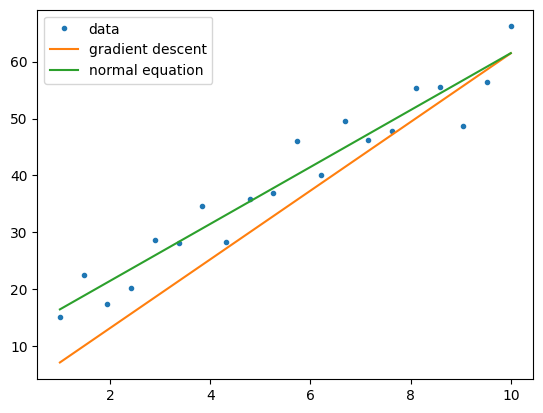

In [37]:
plt.plot(x, y, '.')
plt.plot(x, yhat)
plt.plot(x, yp)
plt.legend(['data','gradient descent', 'normal equation'])

## Least squares method

https://statisticsbyjim.com/regression/least-squares-regression-line/

$$ m = \frac{n\sum_{i=1}^{n}x_i y_i - \sum_{i=1}^{n}x_i \sum_{i=1}^{n}y_i}{\sum_{i=1}^{n}x_i^2 - (\sum_{i=1}^{n}x_i)^2}$$

$$ b = \frac{\sum_{i=1}^{n}y_i - m \sum_{i=1}^{n}x_i}{n} $$

In [38]:
m = (len(x) * np.sum(x*y) - x.sum()*y.sum()) / (len(x) * np.square(x).sum() - x.sum()**2)
m

5.005645694728993

In [39]:
b = (y.sum() - m * x.sum()) /len(x)
b

11.440471959825306

### Plot least squares

In [40]:
ylsq = x * m + b

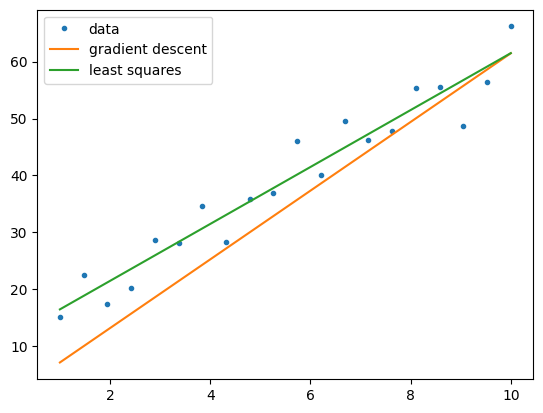

In [41]:
plt.plot(x, y, '.')
plt.plot(x, yhat)
plt.plot(x, ylsq)
plt.legend(['data','gradient descent', 'least squares'])